# DLthon - 길찾는 오리들
## Base Settings

In [1]:
# importing the libraries
import keras, tensorflow as tf
from keras import layers

# keras.mixed_precision.set_global_policy('mixed_float16')

# importing the modules
import models_base, models_top, utils

2025-01-21 11:55:16.902736: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-21 11:55:16.927641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737428116.944875  103811 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737428116.950144  103811 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-21 11:55:16.976673: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# loading the dataset
train_dataset, val_dataset, test_dataset = utils.load_unified_datasets("data/data_disruptive_feature_exclusion")

Found 374 files belonging to 6 classes.
Using 300 files for training.


I0000 00:00:1737428119.224112  103811 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9571 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 374 files belonging to 6 classes.
Using 74 files for validation.


In [3]:
# designing the model
def eV2L_simple2(): # this can be adjusted to be hyper-tunable
    inputs = keras.Input(shape=(224, 224, 3))
    x = utils.image_preprocessing_v1()(inputs) # image preprocessing
    x = models_base.EV2L((224, 224, 3))(x, training=False) # pre-trained model
    x = models_top.simple2()(x) # top model
    outputs = layers.Dense(6, activation='softmax', name="classifier")(x)

    model = keras.Model(inputs, outputs)
    
    model.compile(loss='categorical_crossentropy',
                   optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
                   metrics=['accuracy'])
    
    return model

eV2L_simple2().summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ image_preprocessing_v1          │ (None, 224, 224, 3)    │             7 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-l (Functional)   │ (None, 7, 7, 1280)     │   117,746,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ basic_simple2 (Sequential)      │ (None, 256)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,142,125 (450.68 MB)

 Trainable params: 395,270 (1.51 MB)

 Non-trainable params: 117,746,855 (449.17 MB)

Epoch 1/200


I0000 00:00:1737428154.544905  103929 cuda_dnn.cc:529] Loaded cuDNN version 90600


5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.1839 - loss: 1.8098 - val_accuracy: 0.2344 - val_loss: 1.7675
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 781ms/step - accuracy: 0.2506 - loss: 1.7521 - val_accuracy: 0.2188 - val_loss: 1.7671
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step - accuracy: 0.2294 - loss: 1.7502 - val_accuracy: 0.2500 - val_loss: 1.7689
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step - accuracy: 0.2605 - loss: 1.7316 - val_accuracy: 0.1719 - val_loss: 1.7793
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 853ms/step - accuracy: 0.2901 - loss: 1.7044 - val_accuracy: 0.2656 - val_loss: 1.7493
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 383ms/step - accuracy: 0.3215 - loss: 1.6823 - val_accuracy: 0.2344 - val_loss: 1.7510
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 927ms/step - accuracy: 0.3192 - loss: 1.6787 - val_accuracy: 0.2500 - val_loss: 1.7388
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 853ms/step - accuracy: 0.3636 - loss: 1.6703 - val_accuracy: 0.2344 - val_loss: 1.731

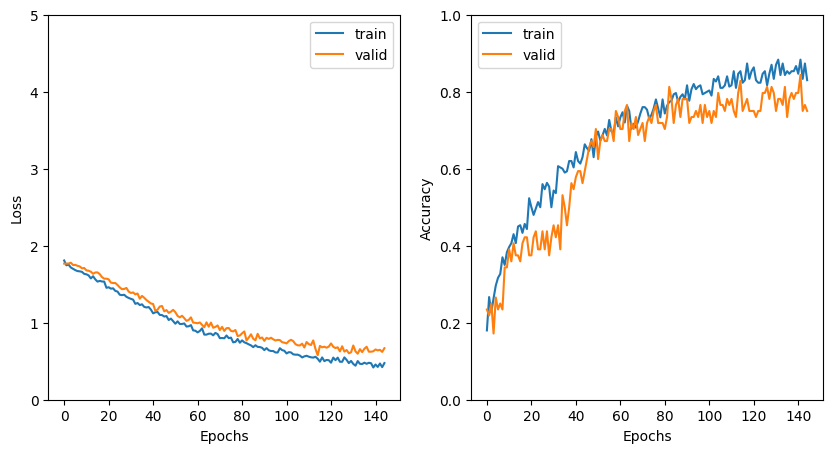

In [4]:
# training the model
eV2L_simple2_history = eV2L_simple2().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('eV2L_simple2.keras'),
        utils.callback_earlystop(30)
    ],
)

# visualizing the training process
utils.plot_history(eV2L_simple2_history)

In [5]:
# evaluating the model
test_loss, test_acc = keras.models.load_model('eV2L_simple2.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.7000 - loss: 0.7893
Test accuracy: 0.70%, Test loss: 0.79


# data_enhanced_0_original_100

Found 374 files belonging to 6 classes.
Using 300 files for training.
Found 374 files belonging to 6 classes.
Using 74 files for validation.
Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.1684 - loss: 1.7981 - val_accuracy: 0.2188 - val_loss: 1.7674
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 724ms/step - accuracy: 0.2043 - loss: 1.7738 - val_accuracy: 0.2188 - val_loss: 1.7581
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 320ms/step - accuracy: 0.2597 - loss: 1.7346 - val_accuracy: 0.1875 - val_loss: 1.7581
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.2502 - loss: 1.7363 - val_accuracy: 0.1875 - val_loss: 1.7669
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 734ms/step - accuracy: 0.3274 - loss: 1.6929 - val_accuracy: 0.2500 - val_loss: 1.7425
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 895ms/step - accuracy: 0.3415 - loss: 1.6797 - val_accuracy: 0.2656 - val_loss: 1.7343
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 751ms/step - accuracy: 0.3268 - loss: 1.7030 - val_accuracy

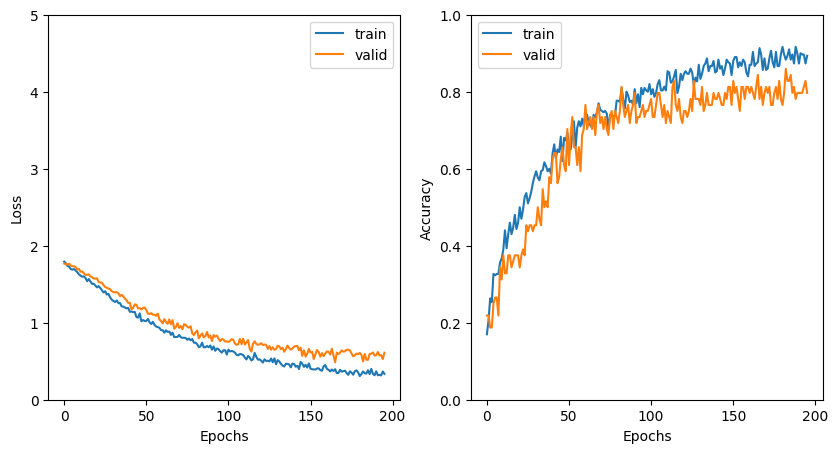

In [6]:
# loading the dataset
train_dataset, val_dataset, test_dataset = utils.load_unified_datasets("data/data_enhanced_0_original_100")

# training the model
eV2L_simple2_history = eV2L_simple2().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('eV2L_simple2_e00o10.keras'),
        utils.callback_earlystop(30)
    ],
)

# visualizing the training process
utils.plot_history(eV2L_simple2_history)

In [7]:
# evaluating the model
test_loss, test_acc = keras.models.load_model('eV2L_simple2_e00o10.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.8000 - loss: 0.5104
Test accuracy: 0.80%, Test loss: 0.51


# data_enhanced_30_original_70

Found 374 files belonging to 6 classes.
Using 300 files for training.
Found 374 files belonging to 6 classes.
Using 74 files for validation.
Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.1603 - loss: 1.8212 - val_accuracy: 0.2188 - val_loss: 1.7720
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - accuracy: 0.1714 - loss: 1.7940 - val_accuracy: 0.1719 - val_loss: 1.7722
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 0.2132 - loss: 1.7616 - val_accuracy: 0.1562 - val_loss: 1.7751
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step - accuracy: 0.1991 - loss: 1.7599 - val_accuracy: 0.1719 - val_loss: 1.7833
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 835ms/step - accuracy: 0.2511 - loss: 1.7345 - val_accuracy: 0.2500 - val_loss: 1.7452
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - accuracy: 0.2883 - loss: 1.7008 - val_accuracy: 0.2188 - val_loss: 1.7495
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 710ms/step - accuracy: 0.2768 - loss: 1.7055 - val_accuracy

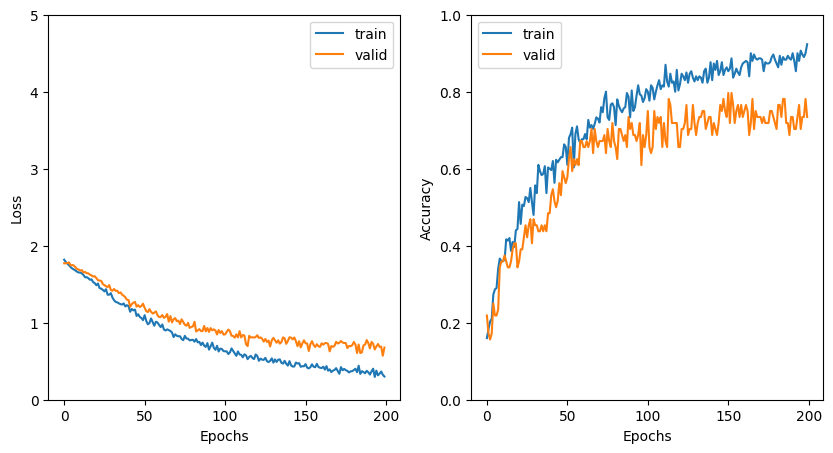

In [8]:
# loading the dataset
train_dataset, val_dataset, test_dataset = utils.load_unified_datasets("data/data_enhanced_30_original_70")

# training the model
eV2L_simple2_history = eV2L_simple2().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('eV2L_simple2_e03o07.keras'),
        utils.callback_earlystop(30)
    ],
)

# visualizing the training process
utils.plot_history(eV2L_simple2_history)

In [9]:
# evaluating the model
test_loss, test_acc = keras.models.load_model('eV2L_simple2_e03o07.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.9000 - loss: 0.3362
Test accuracy: 0.90%, Test loss: 0.34


# data_enhanced_50_original_50

Found 374 files belonging to 6 classes.
Using 300 files for training.
Found 374 files belonging to 6 classes.
Using 74 files for validation.
Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.1483 - loss: 1.8087 - val_accuracy: 0.2031 - val_loss: 1.7621
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 778ms/step - accuracy: 0.2006 - loss: 1.7742 - val_accuracy: 0.1875 - val_loss: 1.7613
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 310ms/step - accuracy: 0.2180 - loss: 1.7500 - val_accuracy: 0.1719 - val_loss: 1.7652
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - accuracy: 0.2147 - loss: 1.7494 - val_accuracy: 0.1406 - val_loss: 1.7657
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 749ms/step - accuracy: 0.2640 - loss: 1.7143 - val_accuracy: 0.2031 - val_loss: 1.7482
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 749ms/step - accuracy: 0.3025 - loss: 1.7111 - val_accuracy: 0.1875 - val_loss: 1.7444
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 730ms/step - accuracy: 0.2836 - loss: 1.6965 - val_accuracy

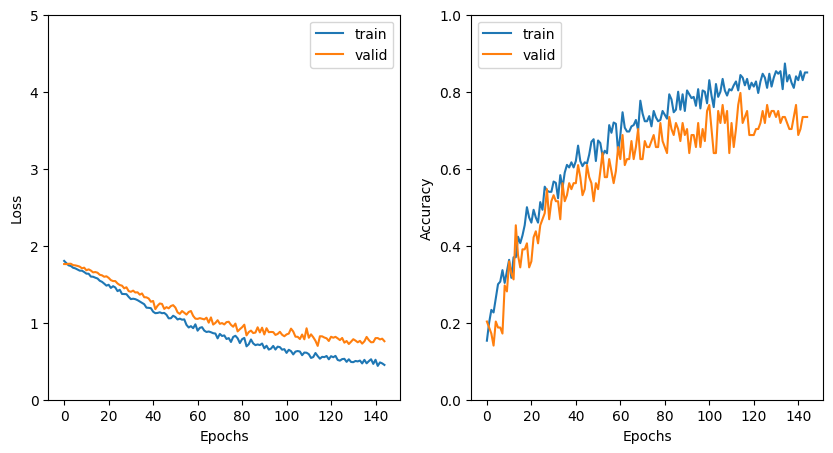

In [10]:
# loading the dataset
train_dataset, val_dataset, test_dataset = utils.load_unified_datasets("data/data_enhanced_50_original_50")

# training the model
eV2L_simple2_history = eV2L_simple2().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('eV2L_simple2_e05o05.keras'),
        utils.callback_earlystop(30)
    ],
)

# visualizing the training process
utils.plot_history(eV2L_simple2_history)

In [11]:
# evaluating the model
test_loss, test_acc = keras.models.load_model('eV2L_simple2_e05o05.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.7000 - loss: 0.9708
Test accuracy: 0.70%, Test loss: 0.97


# data_enhanced_70_original_30

Found 374 files belonging to 6 classes.
Using 300 files for training.
Found 374 files belonging to 6 classes.
Using 74 files for validation.
Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.1574 - loss: 1.7980 - val_accuracy: 0.1562 - val_loss: 1.7978
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 708ms/step - accuracy: 0.2398 - loss: 1.7600 - val_accuracy: 0.1719 - val_loss: 1.7853
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 969ms/step - accuracy: 0.2114 - loss: 1.7549 - val_accuracy: 0.1719 - val_loss: 1.7797
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step - accuracy: 0.2284 - loss: 1.7501 - val_accuracy: 0.1406 - val_loss: 1.7855
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 758ms/step - accuracy: 0.2705 - loss: 1.7113 - val_accuracy: 0.2188 - val_loss: 1.7561
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 338ms/step - accuracy: 0.3519 - loss: 1.6843 - val_accuracy: 0.2031 - val_loss: 1.7563
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3167 - loss: 1.6694 - val_accuracy: 0

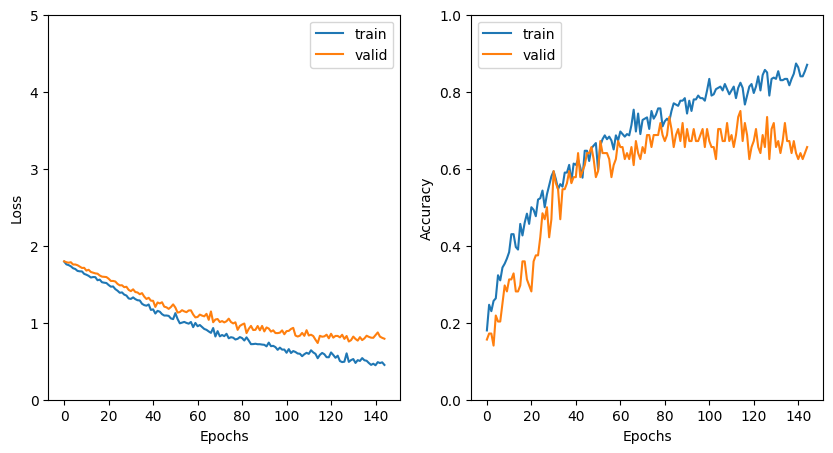

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.7000 - loss: 1.0127
Test accuracy: 0.70%, Test loss: 1.01


In [12]:
# loading the dataset
train_dataset, val_dataset, test_dataset = utils.load_unified_datasets("data/data_enhanced_70_original_30")

# training the model
eV2L_simple2_history = eV2L_simple2().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('eV2L_simple2_e07o03.keras'),
        utils.callback_earlystop(30)
    ],
)

# visualizing the training process
utils.plot_history(eV2L_simple2_history)

# evaluating the model
test_loss, test_acc = keras.models.load_model('eV2L_simple2_e07o03.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

In [13]:
# evaluating the model
test_loss, test_acc = keras.models.load_model('eV2L_simple2_e07o03.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.6000 - loss: 0.7965
Test accuracy: 0.60%, Test loss: 0.80


# data_enhanced_100_original_0

Found 374 files belonging to 6 classes.
Using 300 files for training.
Found 374 files belonging to 6 classes.
Using 74 files for validation.
Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.2208 - loss: 1.7890WARNING:tensorflow:5 out of the last 873 calls to <function TensorFlowTrainer._make_function.<locals>.multi_step_on_iterator at 0x7fd8eec6ae80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.2184 - loss: 

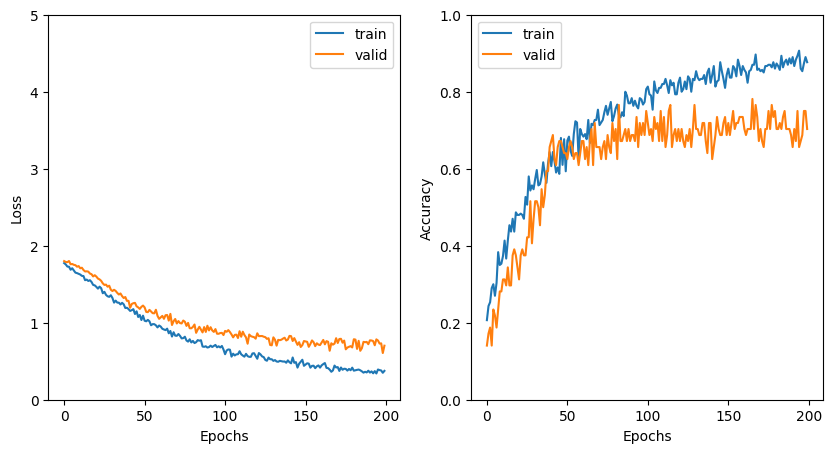

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.6000 - loss: 0.7588
Test accuracy: 0.60%, Test loss: 0.76


In [14]:
# loading the dataset
train_dataset, val_dataset, test_dataset = utils.load_unified_datasets("data/data_enhanced_100_original_0")

# training the model
eV2L_simple2_history = eV2L_simple2().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('eV2L_simple2_e10o00.keras'),
        utils.callback_earlystop(30)
    ],
)

# visualizing the training process
utils.plot_history(eV2L_simple2_history)

# evaluating the model
test_loss, test_acc = keras.models.load_model('eV2L_simple2_e10o00.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")